In [ ]:
#TASK 1
#This assignment is for visualization using matplotlib:
#data to use:
#url= https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
#titanic = pd.read_csv(url)
#Charts to plot:
#1. Create a pie chart presenting the male/female proportion
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

Creating a pie chart presenting the male/female proportion


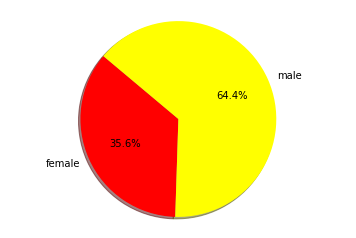

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic_data = pd.read_csv(url)
Sex=titanic_data.groupby(titanic_data.sex).count()
Sex=Sex['name']
labels = 'female', 'male'
sizes = [215, 150, 245, 250]
colors = ['red', 'yellow']
explode = (0, 0,)  # explode 1st slice
 
# Plot
plt.pie(Sex, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
print("Creating a pie chart presenting the male/female proportion")
plt.show()


In [ ]:
#2.Creating a scatterplot with the Fare paid and the Age, differ the plot color by gender


Creating a scatterplot with the Fare paid and the Age, differ the plot color by gender


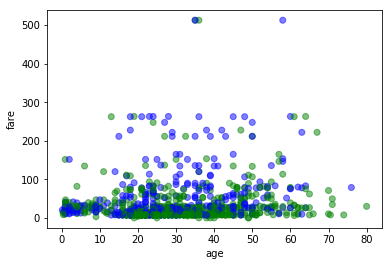

In [16]:


print("Creating a scatterplot with the Fare paid and the Age, differ the plot color by gender")
titanic = titanic_data.dropna(subset=['sex'])
mapping = {'male' : 'green', 'female' : 'blue'}
plt.scatter(titanic['age'], titanic['fare'], alpha=0.5, c=titanic['sex'].map(mapping))
plt.xlabel("age")
plt.ylabel("fare")
plt.show()

In [ ]:
#TASK 2
#It happens all the time: someone gives you data containing malformed strings, Python, lists and
#missing data. How do you tidy it up so you can get on with the analysis?
#Take this monstrosity as the DataFrame to use in the following puzzles:
#df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
#'Budapest_PaRis', 'Brussels_londOn'],
#'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
#'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
#'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})

In [9]:

import pandas as pd
import numpy as np
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'],
                   'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
                   'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [ ]:
#1. Some values in the the FlightNumber column are missing. These numbers are meant to
#increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing
#numbers and make the column an integer column (instead of a float column).

In [10]:
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


In [ ]:
#2. The From_To column would be better as two separate columns! Split each string on the
#underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the
#correct column names to this temporary DataFrame.

In [11]:
df1=pd.DataFrame()
df1['from'] = df['From_To'].str.split('_').str[0]
df1['to'] = df['From_To'].str.split('_').str[1]

df1

,from,to
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [ ]:
#3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame.
#Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [12]:
df1['from']=df1['from'].str.capitalize()
df1['to']=df1['to'].str.capitalize()
df1

,from,to
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


In [ ]:
#4. Delete the From_To column from df and attach the temporary DataFrame from the previous
#questions

In [13]:
del df["From_To"]
df=pd.concat([df,df1],axis=1)
df

,FlightNumber,RecentDelays,Airline,from,to
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


In [ ]:
#5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We
#would like each first value in its own column, each second value in its own column, and so on. If
#there isn't an Nth value, the value should be NaN.
#Expand the Series of lists into a DataFrame named delays, rename the columns delay_1,
#delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [14]:
tDelay = pd.DataFrame(df.RecentDelays)
tDelay = pd.DataFrame(df['RecentDelays'].values.tolist())
tDelay.columns = ['Delay_1', 'Delay_2', 'Delay_3']

df = df.drop('RecentDelays', 1)
df.insert(3, "Delay_1", tDelay['Delay_1'])
df.insert(4, "Delay_2", tDelay['Delay_2'])
df.insert(5, "Delay_3", tDelay['Delay_3'])
df

,FlightNumber,Airline,from,Delay_1,Delay_2,Delay_3,to
0,10045,KLM(!),London,23.0,47.0,NaN,Paris
1,10055,<Air France> (12),Madrid,NaN,NaN,NaN,Milan
2,10065,(British Airways. ),London,24.0,43.0,87.0,Stockholm
3,10075,12. Air France,Budapest,13.0,NaN,NaN,Paris
4,10085,"""Swiss Air""",Brussels,67.0,32.0,NaN,London
